In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

Test1 = pd.read_excel('Reflux_data/Final/Final01.xlsx')

In [7]:
x1 = Test1.drop(['DIST'], axis= 1)
x2 = Test1['DIST']

In [8]:
Test1[Test1['DIST']==1].count()

FLUD_DPWT         353
SLOPE_L           353
SLOPE_H           353
SLOPE_AVG         353
HIGH              353
PUMP_RATIO        353
IMP_SUR_RATIO     353
MANHOLES_RATIO    353
HOUR_RAINFALL     353
DIST              353
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size=0.3, random_state=777)
print(len(X_train), len(X_test),len(y_train),len(y_test))
# print(X_train[:3])
# print(X_test[:3])
# print(y_train)

938 402 938 402


In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # 정규화 라이브러리

In [12]:
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

평균 = 1.4771410818040462e-16, 표준편차= 0.9999999999999999
평균 = -3.6928527045101156e-17, 표준편차= 1.0
평균 = -2.2725247412369942e-17, 표준편차= 1.0
평균 = -3.4087871118554915e-17, 표준편차= 1.0
평균 = -0.025967478824502656, 표준편차= 0.9939538610972616
평균 = 0.04907773007791772, 표준편차= 1.1149842066620759
평균 = 0.04460173734074899, 표준편차= 1.097438710386782
평균 = 0.04625877661834682, 표준편차= 1.1036618140513408


In [13]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1]


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

[[286   0]
 [ 35  81]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       286
           1       1.00      0.70      0.82       116

    accuracy                           0.91       402
   macro avg       0.95      0.85      0.88       402
weighted avg       0.92      0.91      0.91       402



[0.06965174129353234, 0.07960199004975124, 0.08706467661691543, 0.08706467661691543, 0.08706467661691543, 0.09701492537313433, 0.08706467661691543, 0.09701492537313433, 0.09203980099502487, 0.09701492537313433, 0.0945273631840796, 0.09701492537313433, 0.09203980099502487, 0.09203980099502487, 0.08955223880597014, 0.0945273631840796, 0.1044776119402985, 0.10945273631840796, 0.10696517412935323, 0.11194029850746269, 0.10945273631840796, 0.11194029850746269, 0.10945273631840796, 0.11194029850746269, 0.10945273631840796, 0.10696517412935323, 0.10199004975124377, 0.1044776119402985, 0.1044776119402985, 0.11194029850746269]


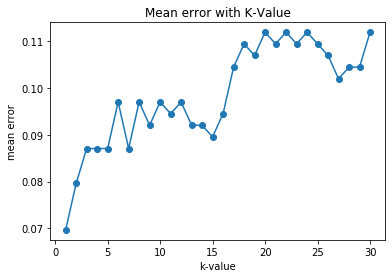

In [16]:
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

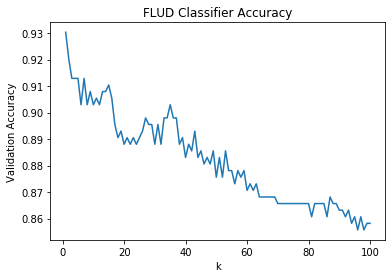

In [17]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("FLUD Classifier Accuracy")
plt.show()